<a href="https://colab.research.google.com/github/Sagor0078/AI/blob/main/Digital_Communication_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

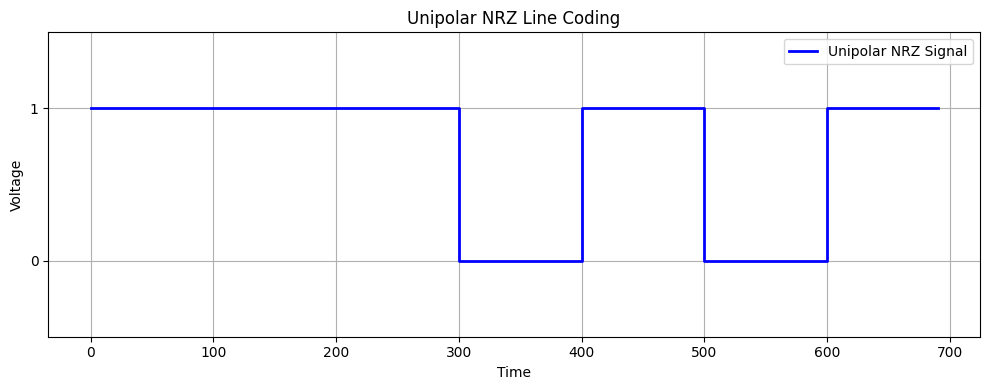

In [9]:
import matplotlib.pyplot as plt

def generate_unipolar_nrz(bits, bit_duration, amplitude=1):
    signal = []
    for bit in bits:
        voltage = amplitude if bit == 1 else 0
        signal.extend([voltage] * bit_duration)
    return signal

# Example input: 1010101 (7-bit sequence)
input_bits = [1, 1, 1, 0, 1, 0, 1]
bit_duration = 10  # Duration of each bit in time units
amplitude = 1      # Amplitude of the signal

unipolar_nrz_signal = generate_unipolar_nrz(input_bits, bit_duration, amplitude)
# print(unipolar_nrz_signal)

# Plotting the signal
plt.figure(figsize=(10, 4))
plt.step(range(0, len(unipolar_nrz_signal) * bit_duration, bit_duration), unipolar_nrz_signal, where='post', color='blue', linewidth=2, label='Unipolar NRZ Signal')
plt.title("Unipolar NRZ Line Coding")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.ylim(-0.5, amplitude + 0.5)
plt.yticks([0, amplitude], ['0', '1'])
plt.grid()
plt.legend()
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


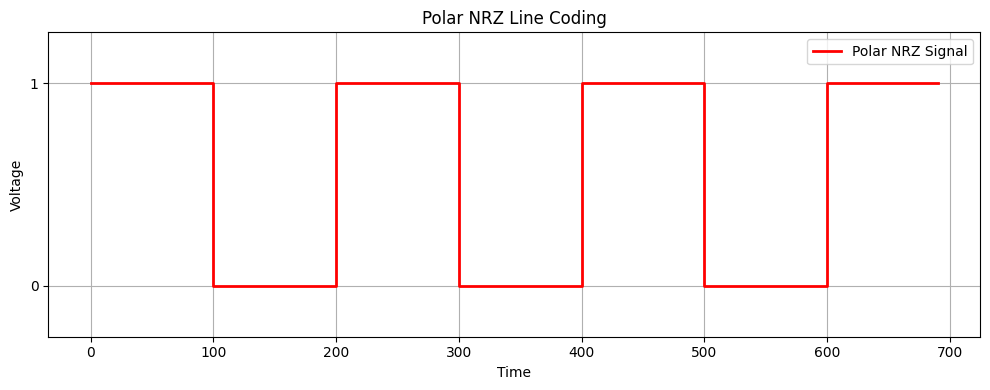

In [ ]:
import matplotlib.pyplot as plt

def generate_polar_nrz(bits, bit_duration, amplitude=1):
    signal = []
    for bit in bits:
        voltage = amplitude if bit == 1 else -amplitude
        signal.extend([voltage] * bit_duration)
    return signal

# Example input: 1010101 (7-bit sequence)
input_bits = [1, 0, 1, 0, 1, 0, 1]
bit_duration = 10  # Duration of each bit in time units
amplitude = 1      # Amplitude of the signal

polar_nrz_signal = generate_polar_nrz(input_bits, bit_duration, amplitude)

# Plotting the signal
plt.figure(figsize=(10, 4))
plt.step(range(0, len(polar_nrz_signal) * bit_duration, bit_duration), polar_nrz_signal, where='post', color='red', linewidth=2, label='Polar NRZ Signal')
plt.title("Polar NRZ Line Coding")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.ylim(-amplitude - 0.5, amplitude + 0.5)
plt.yticks([-amplitude, amplitude], ['0', '1'])
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


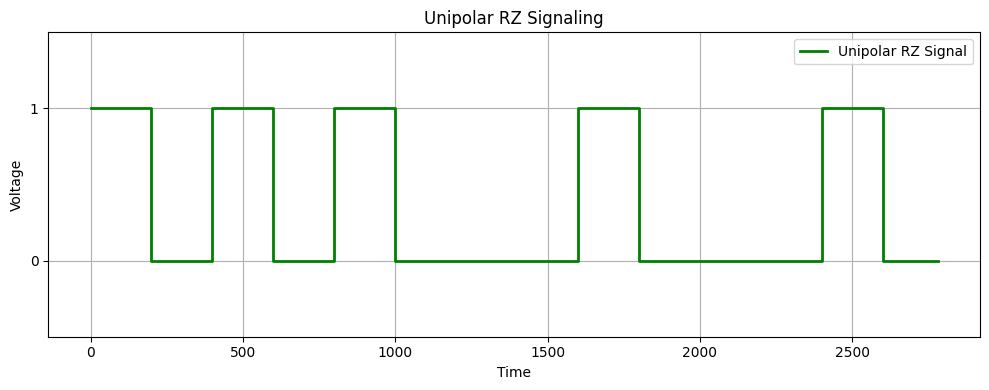

In [ ]:
import matplotlib.pyplot as plt

def generate_unipolar_rz(bits, bit_duration, amplitude=1):
    signal = []
    for bit in bits:
        voltage = amplitude if bit == 1 else 0
        signal.extend([voltage] * (bit_duration // 2))  # First half of the bit interval
        signal.extend([0] * (bit_duration // 2))         # Second half of the bit interval (return to zero)
    return signal

# Example input: 1010101 (7-bit sequence)
input_bits = [1, 1, 1, 0, 1, 0, 1]
bit_duration = 20  # Duration of each bit interval in time units
amplitude = 1      # Amplitude of the signal

unipolar_rz_signal = generate_unipolar_rz(input_bits, bit_duration, amplitude)

# Plotting the signal
plt.figure(figsize=(10, 4))
plt.step(range(0, len(unipolar_rz_signal) * bit_duration, bit_duration), unipolar_rz_signal, where='post', color='green', linewidth=2, label='Unipolar RZ Signal')
plt.title("Unipolar RZ Signaling")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.ylim(-0.5, amplitude + 0.5)
plt.yticks([0, amplitude], ['0', '1'])
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


[1 1 0 0 1 0 0 0 1 1]


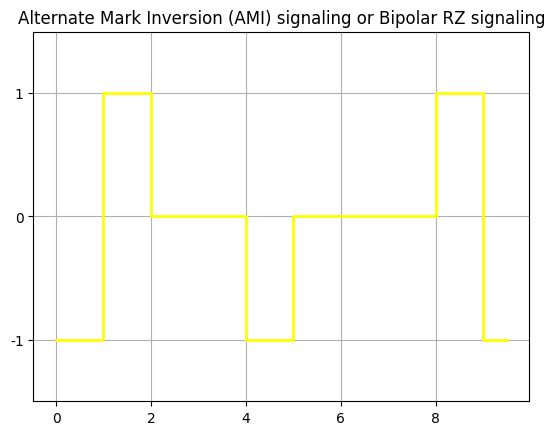

In [ ]:

'''
  Author :
  Muhammad Sagor
  Dept. of ICE , PUST
'''
import numpy as np
import matplotlib.pyplot as plt

N = 10
n = np.random.randint(0, 2, size=N)

# Bipolar Encoding (AMI)
ami_signal = []
last_voltage = 1
for bit in n:
    if bit == 1:
        last_voltage = -last_voltage
        ami_signal.append(last_voltage)
    else:
        ami_signal.append(0)

# Bipolar RZ Pulse Shaping
t = np.arange(0, len(ami_signal), 0.5)
y = np.repeat(ami_signal, 2)
print(n)
plt.step(t, y, where='post', linewidth=2,color = 'yellow')
plt.ylim([-1.5, 1.5])
plt.yticks([-1, 0, 1], ['-1', '0', '1'])
plt.grid(True)
plt.title('Alternate Mark Inversion (AMI) signaling or Bipolar RZ signaling')
plt.show()


[1 0 1 0 0 0 1 0 1 1]


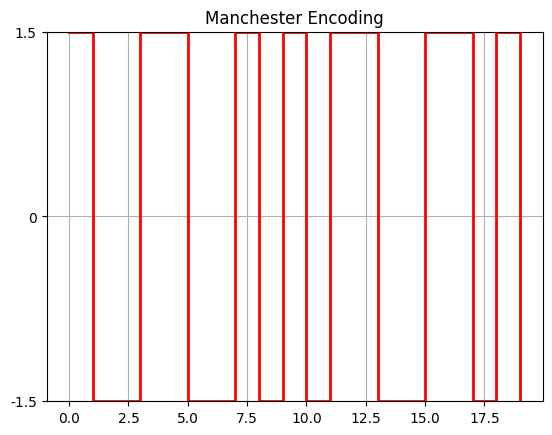

In [ ]:

''' final '''
import numpy as np
import matplotlib.pyplot as plt

N = 10
bits = np.random.randint(0, 2, size=N)
print(bits)

# Manchester Encoding
manchester_signal = []
for bit in bits:
    manchester_signal.extend([-1.5, 1.5] if bit == 0 else [1.5, -1.5])

# Plotting Manchester Encoding
plt.step(range(N * 2), manchester_signal, where='post', linewidth=2,color = 'red')
plt.ylim([-1.5, 1.5])
plt.yticks([-1.5, 0, 1.5], ['-1.5', '0', '1.5'])
plt.grid(True)
plt.title('Manchester Encoding')
plt.show()


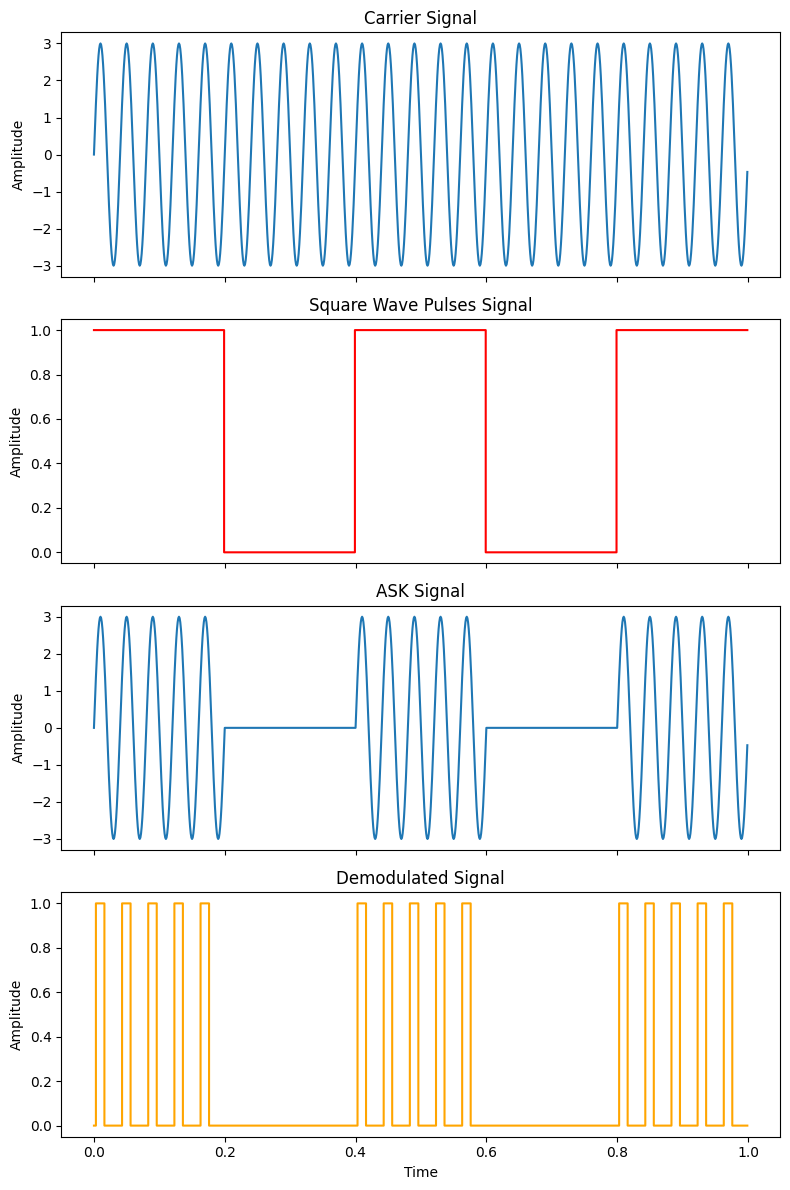

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt

F1 = 25  # Frequency of carrier
A = 3    # Amplitude

t = np.arange(0, 1, 0.001)
x = A * np.sin(2 * np.pi * F1 * t)  # Carrier Sine wave

# Generating the square wave pulses signal
b = [0.2, 0.4, 0.6, 0.8, 1.0]
u = np.zeros(len(t))
pulse_indices = np.searchsorted(t, b)  # Finding indices for pulse onsets
s = 1
for i in range(len(t)):
    if i in pulse_indices:
        if s == 0:
            s = 1
        else:
            s = 0
    u[i] = s

# Generating the ASK signal using vectorized operations
v = A * np.sin(2 * np.pi * F1 * t) * u

# Demodulation (ASK)
threshold = A * 0.5  # Adjust this threshold based on your signal properties and noise
demodulated_signal = []
for value in v:
    if value > threshold:
        demodulated_signal.append(1)
    else:
        demodulated_signal.append(0)

# Plotting
fig, ax = plt.subplots(4, sharex=True, figsize=(8, 12))

ax[0].plot(t, x)
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Carrier Signal')

ax[1].step(t, u, color='red')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Square Wave Pulses Signal')

ax[2].plot(t, v)
ax[2].set_ylabel('Amplitude')
ax[2].set_title('ASK Signal')

ax[3].step(t, demodulated_signal, color='orange')
ax[3].set_xlabel('Time')
ax[3].set_ylabel('Amplitude')
ax[3].set_title('Demodulated Signal')

plt.tight_layout()
plt.show()


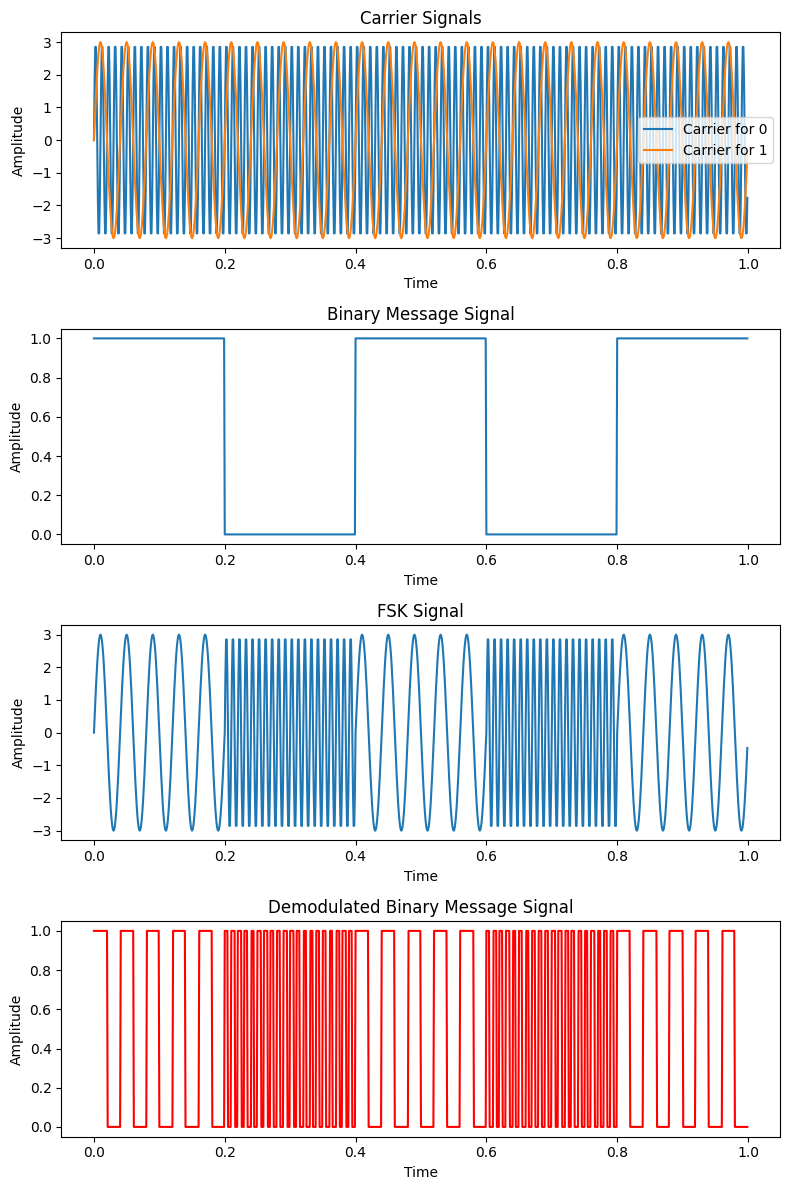

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

F1 = 100  # Frequency for binary digit 0
F2 = 25   # Frequency for binary digit 1

A = 3      # Amplitude
t = np.arange(0, 1, 0.001)
u = []     # Message signal
b = [0.2, 0.4, 0.6, 0.8, 1.0]
s = 1
for i in t:
    if i == b[0]:
        b.pop(0)
        if s == 0:
            s = 1
        else:
            s = 0
    u.append(s)

x1 = A * np.sin(2 * np.pi * F1 * t)  # Carrier wave for binary digit 0
x2 = A * np.sin(2 * np.pi * F2 * t)  # Carrier wave for binary digit 1

v = []
# Sine wave multiplied with square wave
for i in range(len(t)):
    if u[i] == 0:
        v.append(x1[i])
    else:
        v.append(x2[i])

fig, ax = plt.subplots(4, 1, figsize=(8, 12))
ax[0].plot(t, x1, label='Carrier for 0')
ax[0].plot(t, x2, label='Carrier for 1')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Carrier Signals')
ax[0].legend()

ax[1].plot(t, u)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Binary Message Signal')

ax[2].plot(t, v)
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('FSK Signal')

# Frequency Demodulation
threshold = (np.max(x1) + np.min(x1)) / 2  # Threshold for comparison
demodulated_u = []

for i in range(0, len(v), len(t)):
    dot_product_x1 = np.dot(v[i:i + len(t)], x1)
    dot_product_x2 = np.dot(v[i:i + len(t)], x2)
    if dot_product_x1 > dot_product_x2:
        demodulated_u.extend([1 if value > threshold else 0 for value in v[i:i + len(t)]])
    else:
        demodulated_u.extend([1 if value > threshold else 0 for value in v[i:i + len(t)]])

ax[3].plot(t, demodulated_u, 'r')
ax[3].set_xlabel('Time')
ax[3].set_ylabel('Amplitude')
ax[3].set_title('Demodulated Binary Message Signal')

plt.tight_layout()
plt.show()


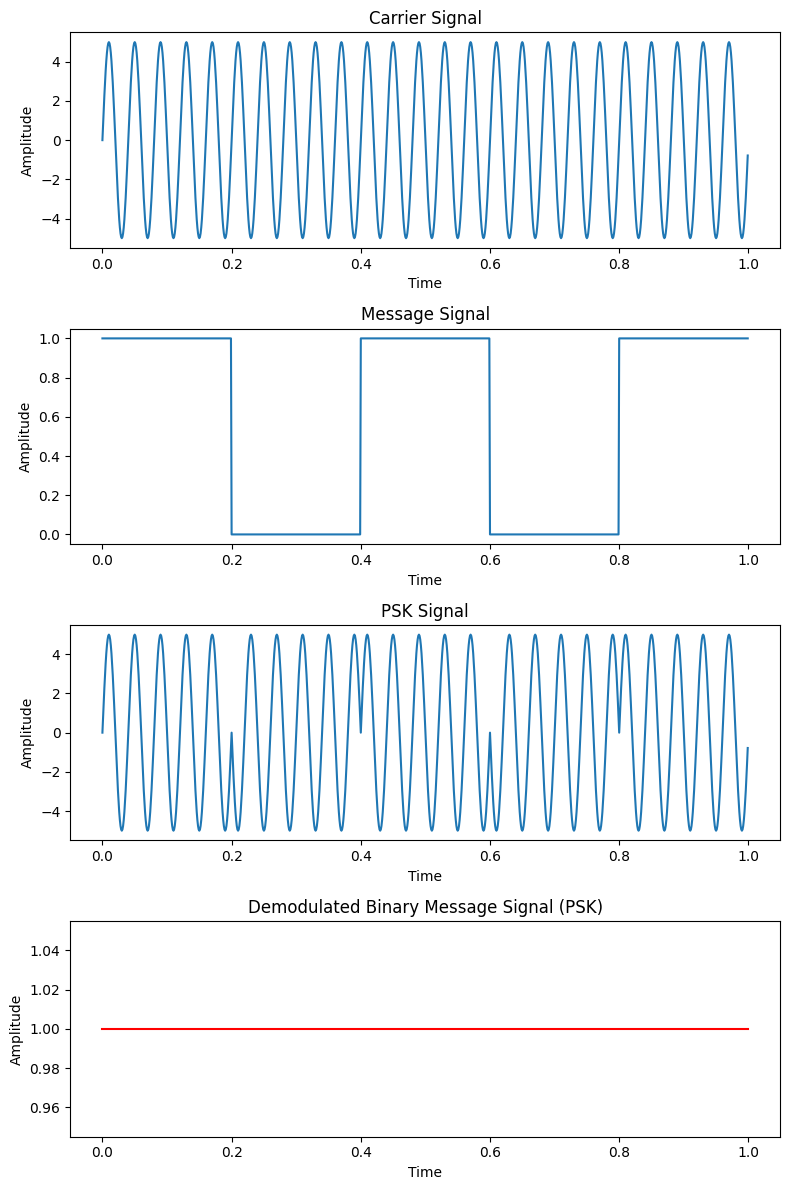

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 5
t = np.arange(0, 1, 0.001)
f1 = 25
f2 = 25
x = A * np.sin(2 * np.pi * f1 * t)

u = []  # Message signal
b = [0.2, 0.4, 0.6, 0.8, 1.0]
s = 1
for i in t:
    if i == b[0]:
        b.pop(0)
        if s == 0:
            s = 1
        else:
            s = 0
    u.append(s)

v = []  # Sine wave multiplied with square wave
for i in range(len(t)):
    if u[i] == 1:
        v.append(A * np.sin(2 * np.pi * f1 * t[i]))
    else:
        v.append(A * np.sin(2 * np.pi * f1 * t[i]) * -1)


# fig, axs = plt.subplots(4)
fig, axs = plt.subplots(4, 1, figsize=(8, 12))
axs[0].plot(t, x)
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Carrier Signal")

axs[1].plot(t, u)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Message Signal')

axs[2].plot(t, v)
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Amplitude")
axs[2].set_title("PSK Signal")

# PSK Demodulation
demodulated_u = []
for i in range(0, len(t), len(x)):
    phase_difference = np.arctan2(np.sum(v[i:i + len(x)] * np.sin(2 * np.pi * f1 * t[i:i + len(x)])), np.sum(v[i:i + len(x)] * np.cos(2 * np.pi * f1 * t[i:i + len(x)])))
    demodulated_u.extend([1 if phase_difference > 0 else 0] * len(x))

# Plotting Demodulated Binary Message Signal
# fig, ax = plt.subplots()
axs[3].plot(t, demodulated_u, 'r')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Amplitude')
axs[3].set_title('Demodulated Binary Message Signal (PSK)')
plt.tight_layout()
plt.show()



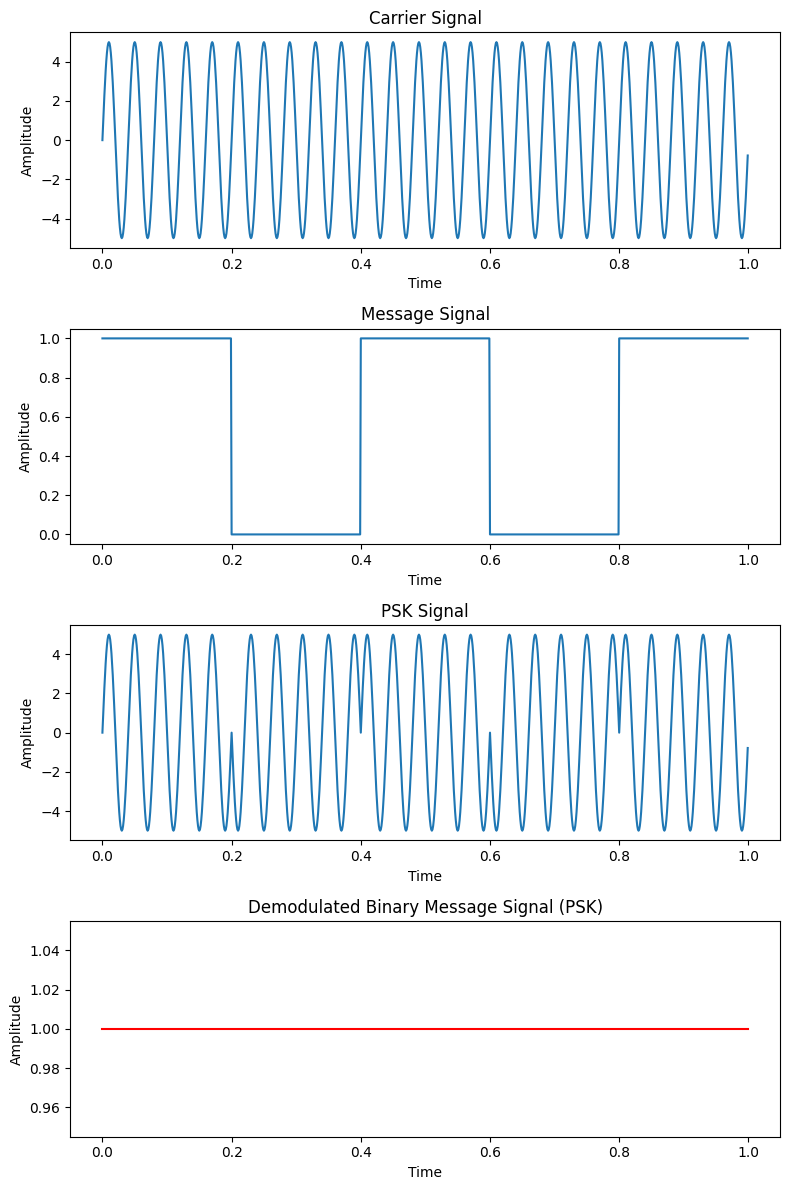

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 5
t = np.arange(0, 1, 0.001)
f1 = 25
f2 = 25
x = A * np.sin(2 * np.pi * f1 * t)

u = []  # Message signal
b = [0.2, 0.4, 0.6, 0.8, 1.0]
s = 1
for i in t:
    if i == b[0]:
        b.pop(0)
        if s == 0:
            s = 1
        else:
            s = 0
    u.append(s)

v = []  # Sine wave multiplied with square wave
for i in range(len(t)):
    if u[i] == 1:
        v.append(A * np.sin(2 * np.pi * f1 * t[i]))
    else:
        v.append(A * np.sin(2 * np.pi * f1 * t[i]) * -1)

fig, axs = plt.subplots(4, 1, figsize=(8, 12))
axs[0].plot(t, x)
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Carrier Signal")

axs[1].plot(t, u)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Message Signal')

axs[2].plot(t, v)
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Amplitude")
axs[2].set_title("PSK Signal")

# PSK Demodulation
demodulated_u = []
window_size = len(t)
for i in range(0, len(v) - window_size + 1, window_size):
    phase_difference = np.arctan2(np.sum(v[i:i + window_size] * np.sin(2 * np.pi * f1 * t[i:i + window_size])),
                                  np.sum(v[i:i + window_size] * np.cos(2 * np.pi * f1 * t[i:i + window_size])))
    demodulated_u.extend([1 if phase_difference > 0 else 0] * window_size)

# Handle the remaining samples
remaining_samples = len(v) % window_size
phase_difference = np.arctan2(np.sum(v[-remaining_samples:] * np.sin(2 * np.pi * f1 * t[-remaining_samples:])),
                              np.sum(v[-remaining_samples:] * np.cos(2 * np.pi * f1 * t[-remaining_samples:])))
demodulated_u.extend([1 if phase_difference > 0 else 0] * remaining_samples)

# Plotting Demodulated Binary Message Signal
axs[3].plot(t, demodulated_u, 'r')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Amplitude')
axs[3].set_title('Demodulated Binary Message Signal (PSK)')

plt.tight_layout()
plt.show()


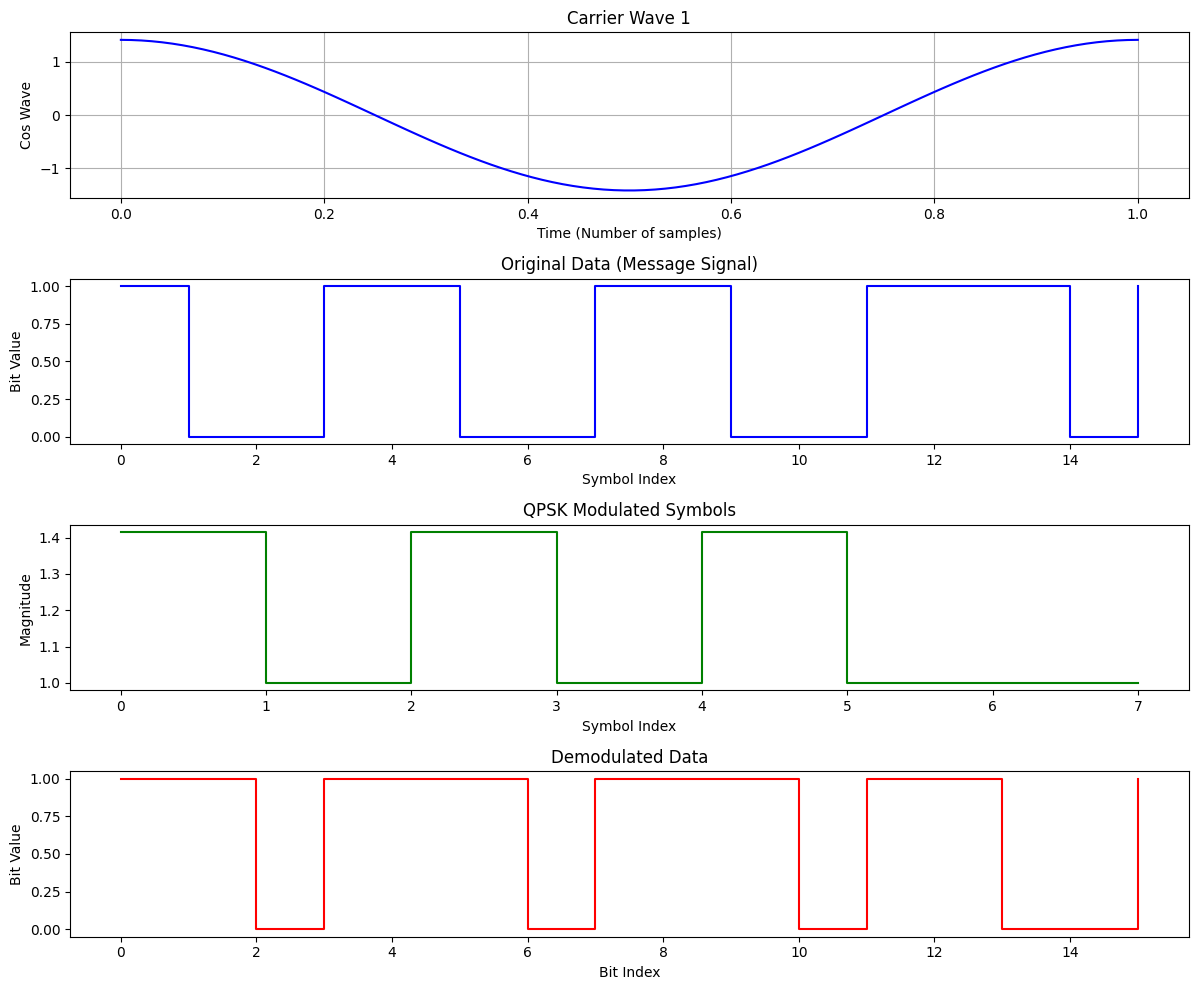

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_qpsk_symbols(data):
    qpsk_symbols = []
    for i in range(0, len(data), 2):
        if data[i] == 0 and data[i + 1] == 0:
            qpsk_symbols.append(1 + 1j)  # 0 degrees
        elif data[i] == 0 and data[i + 1] == 1:
            qpsk_symbols.append(1j)  # 90 degrees
        elif data[i] == 1 and data[i + 1] == 0:
            qpsk_symbols.append(-1 + 1j)  # 180 degrees
        else:
            qpsk_symbols.append(-1j)  # 270 degrees
    return qpsk_symbols

def qpsk_demodulation(qpsk_symbols):
    demodulated_data = []
    for symbol in qpsk_symbols:
        phase = np.angle(symbol)
        if -np.pi/4 <= phase < np.pi/4:
            demodulated_data.extend([0, 0])
        elif np.pi/4 <= phase < 3*np.pi/4:
            demodulated_data.extend([0, 1])
        elif 3*np.pi/4 <= phase < np.pi or -np.pi <= phase < -3*np.pi/4:
            demodulated_data.extend([1, 1])
        else:
            demodulated_data.extend([1, 0])
    return demodulated_data

def main():
    tb = 1
    fc = 1
    t = np.linspace(0, 1, 100)

    c1 = np.sqrt(2 / tb) * np.cos(2 * np.pi * fc * t)
    c2 = np.sqrt(2 / tb) * np.sin(2 * np.pi * fc * t)

    # Generating random binary data
    m = np.random.randint(0, 2, 16)

    qpsk_symbols = generate_qpsk_symbols(m)
    demodulated_data = qpsk_demodulation(qpsk_symbols)

    # Plotting
    plt.figure(figsize=(12, 10))

    plt.subplot(4, 1, 1)
    plt.plot(t, c1, color='blue')
    plt.grid()
    plt.xlabel('Time (Number of samples)')
    plt.ylabel('Cos Wave')
    plt.title('Carrier Wave 1')

    plt.subplot(4, 1, 2)
    plt.step(np.arange(0, 16), m, where='post', color='b')
    plt.xlabel('Symbol Index')
    plt.ylabel('Bit Value')
    plt.title('Original Data (Message Signal)')

    plt.subplot(4, 1, 3)
    plt.step(np.arange(0, len(qpsk_symbols)), np.abs(qpsk_symbols), where='post', color='g')
    plt.xlabel('Symbol Index')
    plt.ylabel('Magnitude')
    plt.title('QPSK Modulated Symbols')

    plt.subplot(4, 1, 4)
    plt.step(np.arange(0, len(demodulated_data)), demodulated_data, where='post', color='r')
    plt.xlabel('Bit Index')
    plt.ylabel('Bit Value')
    plt.title('Demodulated Data')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


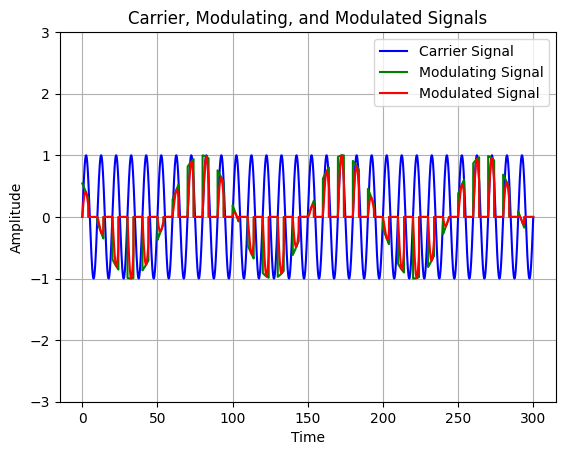

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

percent = 40.0
TimePeriod = 10.0
Cycles = 30
dt = 0.01

t = np.arange(0, Cycles * TimePeriod, dt)
pwm = (t % TimePeriod) < (TimePeriod * percent / 100)

x = np.linspace(-10, 10, len(pwm))
y_modulating = np.sin(x)

y_modulating[pwm == 0] = 0

# Generate the carrier signal
carrier_frequency = 1 / TimePeriod
carrier = np.sin(2 * np.pi * carrier_frequency * t)

# Modulate the carrier signal
modulated_signal = carrier * y_modulating

plt.plot(t, carrier, label='Carrier Signal', color='blue')
plt.plot(t, y_modulating, label='Modulating Signal', color='green')
plt.plot(t, modulated_signal, label='Modulated Signal', color='red')

plt.ylim([-3, 3])
plt.title("Carrier, Modulating, and Modulated Signals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.show()


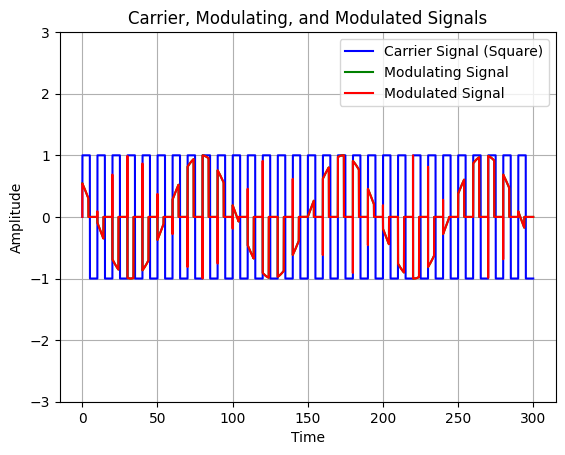

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

percent = 40.0
TimePeriod = 10.0
Cycles = 30
dt = 0.01

t = np.arange(0, Cycles * TimePeriod, dt)
pwm = (t % TimePeriod) < (TimePeriod * percent / 100)

x = np.linspace(-10, 10, len(pwm))
y_modulating = np.sin(x)

y_modulating[pwm == 0] = 0

# Generate the square waveform carrier signal
carrier_frequency = 1 / TimePeriod
carrier = np.sign(np.sin(2 * np.pi * carrier_frequency * t))

# Modulate the carrier signal
modulated_signal = carrier * y_modulating

plt.plot(t, carrier, label='Carrier Signal (Square)', color='blue')
plt.plot(t, y_modulating, label='Modulating Signal', color='green')
plt.plot(t, modulated_signal, label='Modulated Signal', color='red')

plt.ylim([-3, 3])
plt.title("Carrier, Modulating, and Modulated Signals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.show()


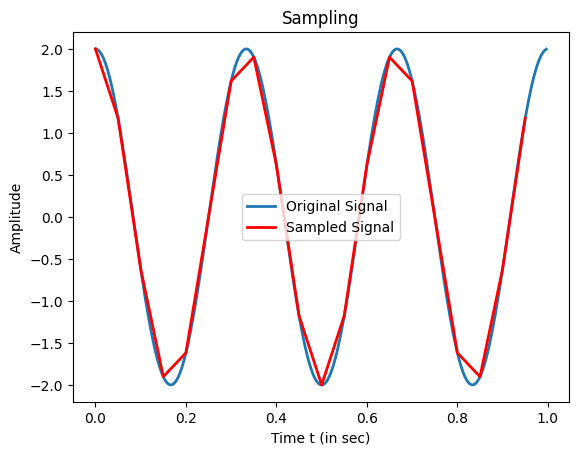

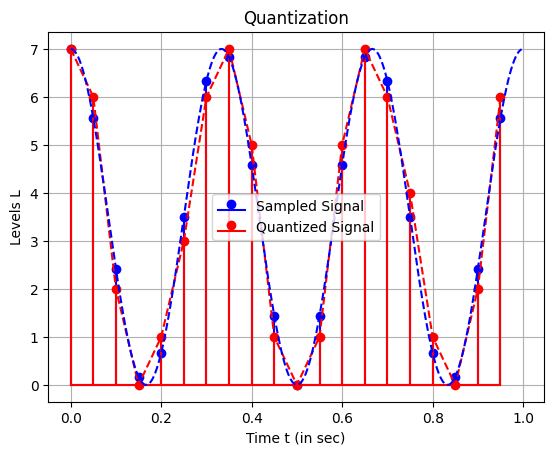

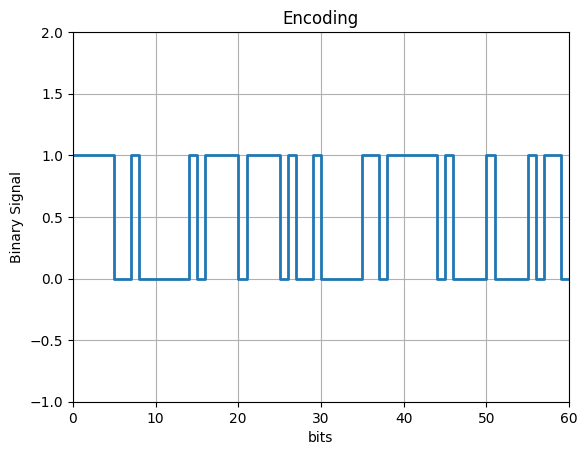

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pcm(A, fm, fs, n):
    t = np.arange(0, 1, 1 / (100 * fm))
    x = A * np.cos(2 * np.pi * fm * t)

    ts = np.arange(0, 1, 1 / fs)
    xs = A * np.cos(2 * np.pi * fm * ts)

    x1 = xs + A
    x1 = x1 / (2 * A)
    L = (-1 + 2**n)
    x1 = L * x1
    xq = np.round(x1)
    r = xq / L
    r = 2 * A * r
    r = r - A

    y = []
    for i in range(len(xq)):
        d = format(int(xq[i]), f'0{n}b')
        y.extend(map(int, d))

    MSE = np.sum((xs - r)**2) / len(x)
    Bitrate = n * fs
    Stepsize = 2 * A / L
    QNoise = (Stepsize**2) / 12

    plt.figure(1)
    plt.plot(t, x, linewidth=2, label='Original Signal')
    plt.plot(ts, xs, 'r', linewidth=2, label='Sampled Signal')
    plt.title('Sampling')
    plt.ylabel('Amplitude')
    plt.xlabel('Time t (in sec)')
    plt.legend()

    plt.figure(2)
    plt.stem(ts, x1, markerfmt='bo', basefmt='b', linefmt='b', label='Sampled Signal')
    plt.stem(ts, xq, 'r', markerfmt='ro', basefmt='r', linefmt='r', label='Quantized Signal')
    plt.plot(ts, xq, '--r')
    plt.plot(t, (x + A) * L / (2 * A), '--b')
    plt.title('Quantization')
    plt.ylabel('Levels L')
    plt.xlabel('Time t (in sec)')
    plt.grid(True)
    plt.legend()

    plt.figure(3)
    plt.step(np.arange(len(y) + 1), y + [y[-1]], linewidth=2, where='post')
    plt.title('Encoding')
    plt.ylabel('Binary Signal')
    plt.xlabel('bits')
    plt.axis([0, len(y), -1, 2])
    plt.grid(True)

    plt.show()

# Example usage
pcm(2, 3, 20, 3)


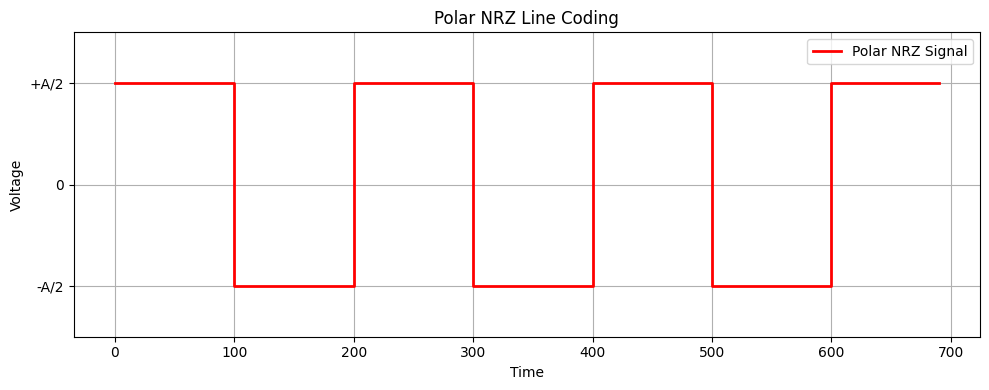

In [3]:
import matplotlib.pyplot as plt

def generate_polar_nrz(bits, bit_duration, amplitude=1):
    signal = []
    for bit in bits:
        voltage = amplitude if bit == 1 else -amplitude
        signal.extend([voltage] * bit_duration)
    return signal

def plot_polar_nrz(signal, bit_duration, amplitude):
    plt.figure(figsize=(10, 4))
    plt.step(
        range(0, len(signal) * bit_duration, bit_duration),
        signal,
        where='post',
        color='red',
        linewidth=2,
        label='Polar NRZ Signal'
    )
    plt.title("Polar NRZ Line Coding")
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.ylim(-amplitude - 0.5, amplitude + 0.5)
    plt.yticks([-amplitude, 0, amplitude], ['-A/2', '0', '+A/2'])  # Adjusted yticks
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example input: 1010101 (7-bit sequence)
input_bits = [1, 0, 1, 0, 1, 0, 1]
bit_duration = 10
amplitude = 1

polar_nrz_signal = generate_polar_nrz(input_bits, bit_duration, amplitude)
plot_polar_nrz(polar_nrz_signal, bit_duration, amplitude)


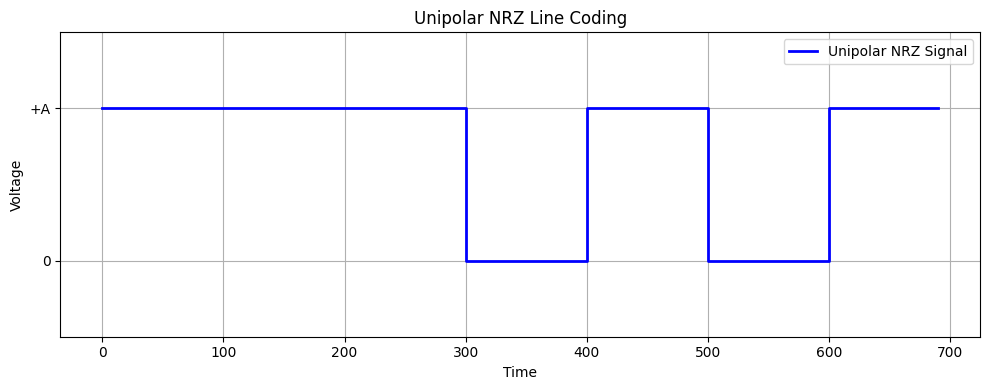

In [5]:
import matplotlib.pyplot as plt

def generate_unipolar_nrz(bits, bit_duration, amplitude=1):
    signal = []
    for bit in bits:
        voltage = amplitude if bit == 1 else 0
        signal.extend([voltage] * bit_duration)
    return signal

def plot_unipolar_nrz(signal, bit_duration, amplitude):
    plt.figure(figsize=(10, 4))
    plt.step(
        range(0, len(signal) * bit_duration, bit_duration),
        signal,
        where='post',
        color='blue',
        linewidth=2,
        label='Unipolar NRZ Signal'
    )
    plt.title("Unipolar NRZ Line Coding")
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.ylim(-0.5, amplitude + 0.5)
    plt.yticks([0, amplitude], ['0', '+A'])  # Adjusted yticks
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example input: 1010101 (7-bit sequence)
input_bits = [1, 1, 1, 0, 1, 0, 1]
bit_duration = 10
amplitude = 1

unipolar_nrz_signal = generate_unipolar_nrz(input_bits, bit_duration, amplitude)
plot_unipolar_nrz(unipolar_nrz_signal, bit_duration, amplitude)


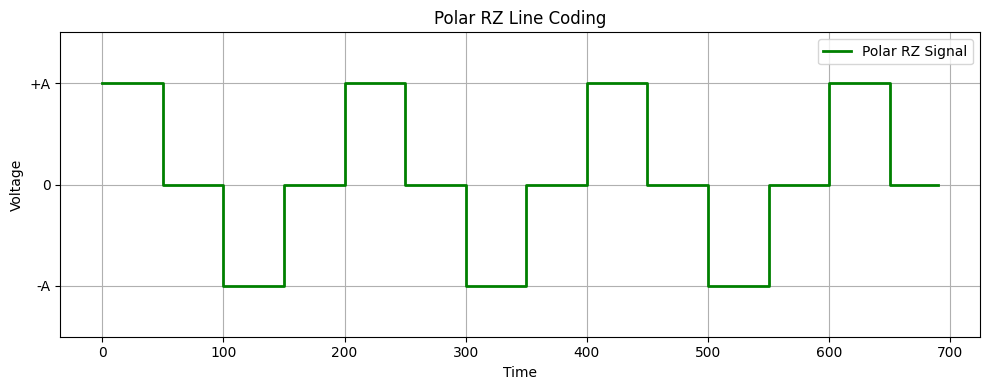

In [7]:
import matplotlib.pyplot as plt

def generate_polar_rz(bits, bit_duration, amplitude=1):
    signal = []
    for bit in bits:
        if bit == 1:
            signal.extend([amplitude] * int(bit_duration/2))
            signal.extend([0] * int(bit_duration/2))
        else:
            signal.extend([-amplitude] * int(bit_duration/2))
            signal.extend([0] * int(bit_duration/2))
    return signal

def plot_polar_rz(signal, bit_duration, amplitude):
    plt.figure(figsize=(10, 4))
    plt.step(
        range(0, len(signal) * bit_duration, bit_duration),
        signal,
        where='post',
        color='green',
        linewidth=2,
        label='Polar RZ Signal'
    )
    plt.title("Polar RZ Line Coding")
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.ylim(-amplitude - 0.5, amplitude + 0.5)
    plt.yticks([-amplitude, 0, amplitude], ['-A', '0', '+A'])
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example input: 1010101 (7-bit sequence)
input_bits = [1, 0, 1, 0, 1, 0, 1]
bit_duration = 10
amplitude = 1

polar_rz_signal = generate_polar_rz(input_bits, bit_duration, amplitude)
plot_polar_rz(polar_rz_signal, bit_duration, amplitude)


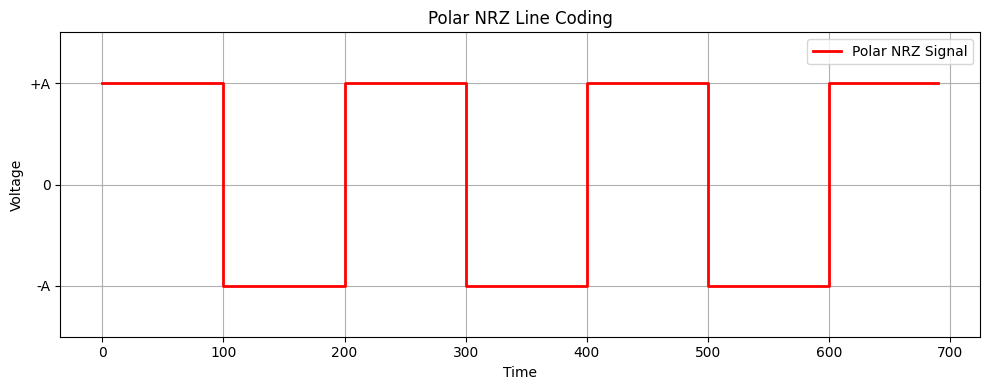

In [8]:
import matplotlib.pyplot as plt

def generate_polar_nrz(bits, bit_duration, amplitude=1):
    signal = []
    for bit in bits:
        voltage = amplitude if bit == 1 else -amplitude
        signal.extend([voltage] * bit_duration)
    return signal

def plot_polar_nrz(signal, bit_duration, amplitude):
    plt.figure(figsize=(10, 4))
    plt.step(
        range(0, len(signal) * bit_duration, bit_duration),
        signal,
        where='post',
        color='red',
        linewidth=2,
        label='Polar NRZ Signal'
    )
    plt.title("Polar NRZ Line Coding")
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.ylim(-amplitude - 0.5, amplitude + 0.5)
    plt.yticks([-amplitude, 0, amplitude], ['-A', '0', '+A'])  # Corrected yticks
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example input: 1010101 (7-bit sequence)
input_bits = [1, 0, 1, 0, 1, 0, 1]
bit_duration = 10
amplitude = 1

polar_nrz_signal = generate_polar_nrz(input_bits, bit_duration, amplitude)
plot_polar_nrz(polar_nrz_signal, bit_duration, amplitude)


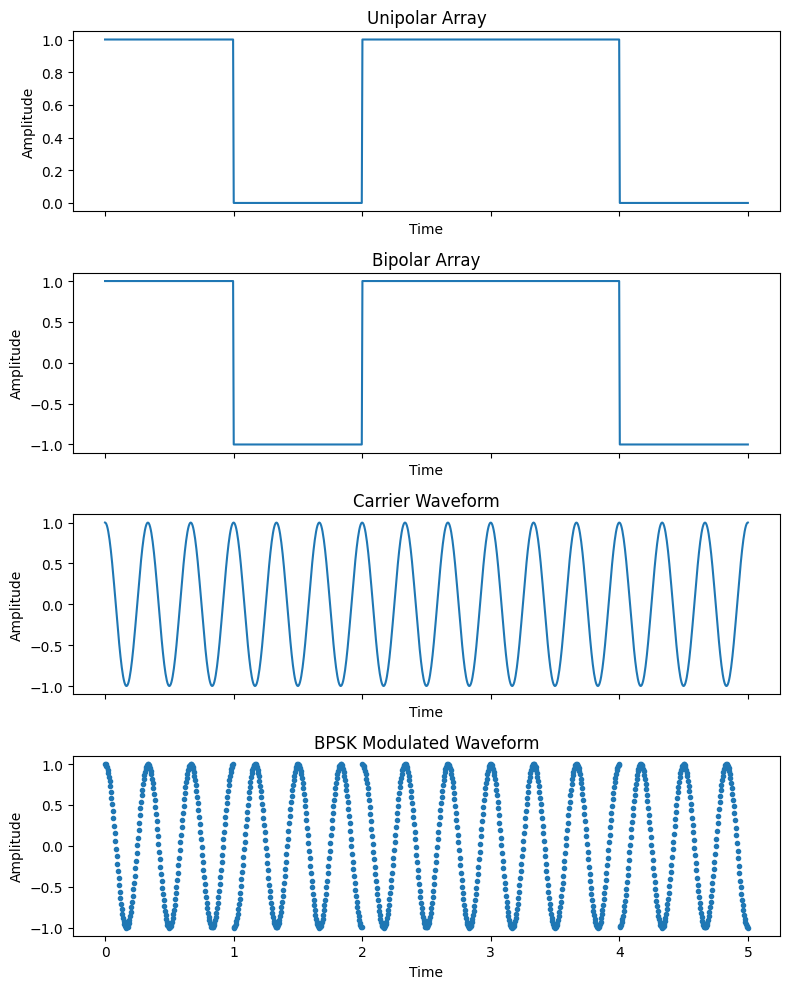

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given unipolar array
unipolar_arr = np.array([1, 0, 1, 1, 0])

# Convert to bipolar
bipolar = 2 * unipolar_arr - 1

# Parameters
bit_duration = 1
amplitude_scaling_factor = bit_duration / 2
carrier_frequency = 3 / bit_duration
n_samples = 1000
time = np.linspace(0, 5, n_samples)

# Generate waveform
waveform = np.sqrt(2 * amplitude_scaling_factor / bit_duration) * np.cos(2 * np.pi * carrier_frequency * time)

# Generate BPSK modulated waveform
bpsk_w = bipolar.repeat(n_samples // unipolar_arr.size) * waveform

# Plotting
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(8, 10))
axs[0].plot(time, unipolar_arr.repeat(n_samples // unipolar_arr.size))
axs[0].set_title('Unipolar Array')
axs[1].plot(time, bipolar.repeat(n_samples // unipolar_arr.size))
axs[1].set_title('Bipolar Array')
axs[2].plot(time, waveform)
axs[2].set_title('Carrier Waveform')
axs[3].plot(time, bpsk_w, '.')
axs[3].set_title('BPSK Modulated Waveform')

for ax in axs:
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


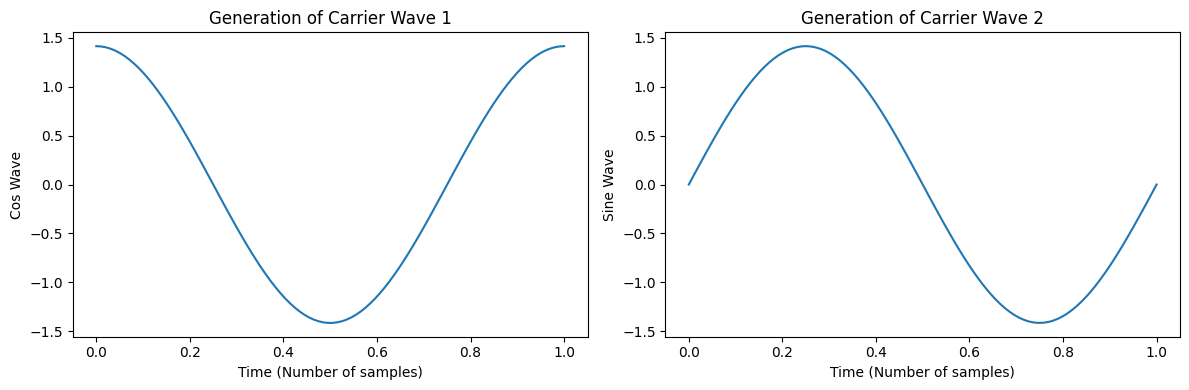

<ipython-input-5-f02074969bc7>:35: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax3.stem(range(16), m, use_line_collection=True)


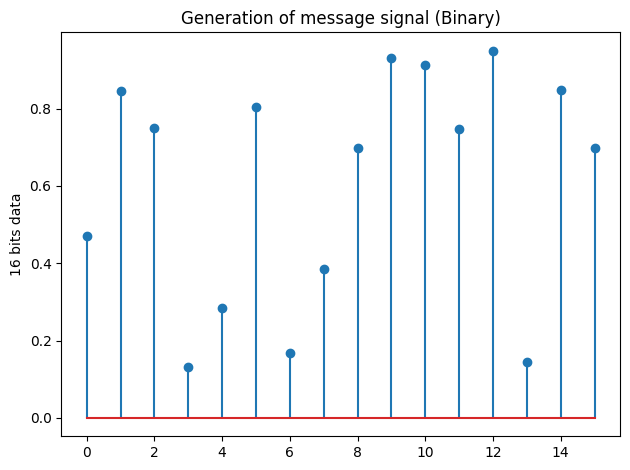

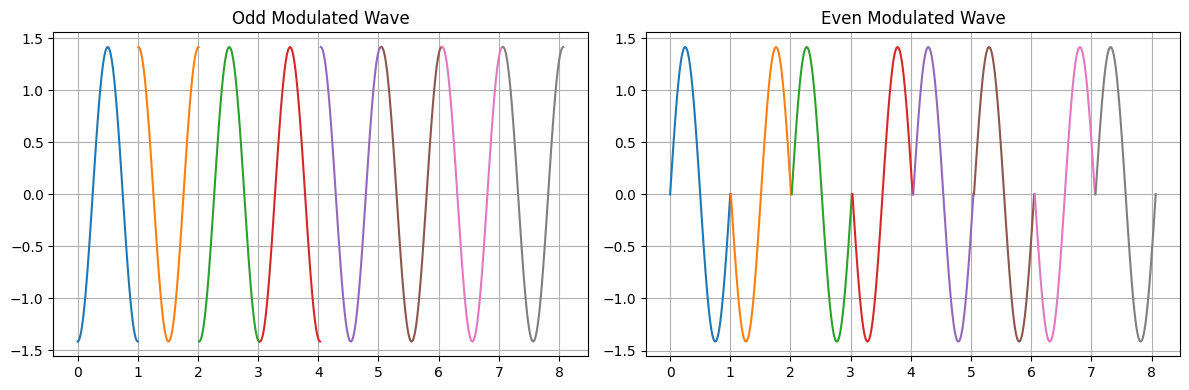

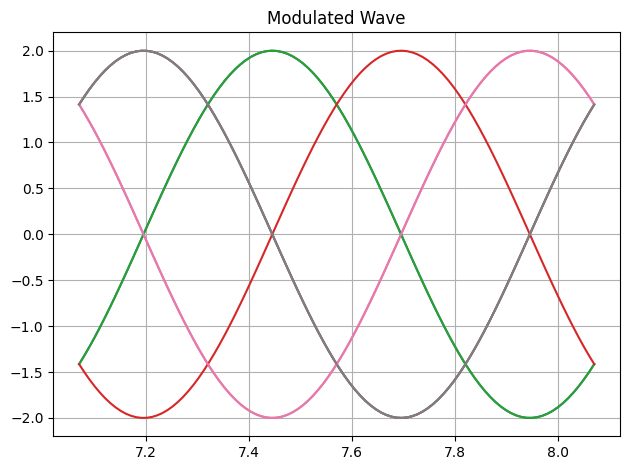

<ipython-input-5-f02074969bc7>:103: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax5.stem(range(16), demod, use_line_collection=True)


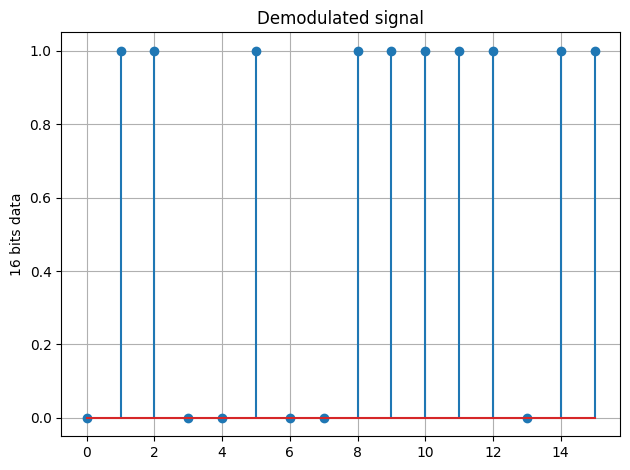

In [5]:
'''
   QPSK : Quadrature Phase Shift keying

'''

import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random

# Generation of Carrier Waves
t = np.linspace(0, 1, 100)  # Time
tb = 1
fc = 1  # carrier frequency

c1 = sqrt(2 / tb) * np.cos(2 * np.pi * fc * t)  # carrier frequency cosine wave
c2 = sqrt(2 / tb) * np.sin(2 * np.pi * fc * t)  # carrier frequency sine wave

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(t, c1)
ax1.set_xlabel('Time (Number of samples)')
ax1.set_ylabel('Cos Wave')
ax1.set_title('Generation of Carrier Wave 1')
ax2.plot(t, c2)
ax2.set_xlabel('Time (Number of samples)')
ax2.set_ylabel('Sine Wave')
ax2.set_title('Generation of Carrier Wave 2')
plt.tight_layout()
plt.show()

# Generation of Message Signal
m = [random.uniform(0, 1) for _ in range(16)]

fig, ax3 = plt.subplots()
ax3.stem(range(16), m, use_line_collection=True)
ax3.set_ylabel('16 bits data')
ax3.set_title('Generation of message signal (Binary)')
plt.tight_layout()
plt.show()

# Modulation
odd_sig = np.zeros((16, 100))
even_sig = np.zeros((16, 100))
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
t1 = 0
t2 = tb
for i in range(0, 15, 2):
    t = np.linspace(t1, t2, 100)
    m_i = 1 if m[i] > 0.5 else 0
    m_s = np.ones_like(t) if m_i else -np.ones_like(t)
    odd_sig[i, :] = c1 * m_s

    m_i = 1 if m[i + 1] > 0.5 else 0
    m_s = np.ones_like(t) if m_i else -np.ones_like(t)
    even_sig[i, :] = c2 * m_s

    axs[0].plot(t, odd_sig[i, :])
    axs[1].plot(t, even_sig[i, :])
    t1 = t1 + (tb + 0.01)
    t2 = t2 + (tb + 0.01)
axs[0].grid()
axs[0].set_title('Odd Modulated Wave')
axs[1].grid()
axs[1].set_title('Even Modulated Wave')
plt.tight_layout()
plt.show()

channel = odd_sig + even_sig

fig, ax4 = plt.subplots()
for i in range(0, 15, 2):
    ax4.plot(t, channel[i, :])
ax4.grid()
ax4.set_title('Modulated Wave')
plt.tight_layout()
plt.show()

# Demodulation
t1 = 0
t2 = tb

demod = np.zeros((16, 1))
fig, ax5 = plt.subplots()
for i in range(0, 15, 1):
    x1 = sum(c1 * channel[i, :])
    x2 = sum(c2 * channel[i, :])

    if x1 > 0 and x2 > 0:
        demod[i] = 1
        demod[i + 1] = 1
    elif x1 > 0 and x2 < 0:
        demod[i] = 1
        demod[i + 1] = 0
    elif x1 < 0 and x2 < 0:
        demod[i] = 0
        demod[i + 1] = 0
    elif x1 < 0 and x2 > 0:
        demod[i] = 0
        demod[i + 1] = 1

    t1 = t1 + (tb + 0.01)
    t2 = t2 + (tb + 0.01)
ax5.stem(range(16), demod, use_line_collection=True)
ax5.grid()
ax5.set_ylabel('16 bits data')
ax5.set_title('Demodulated signal')
plt.tight_layout()
plt.show()


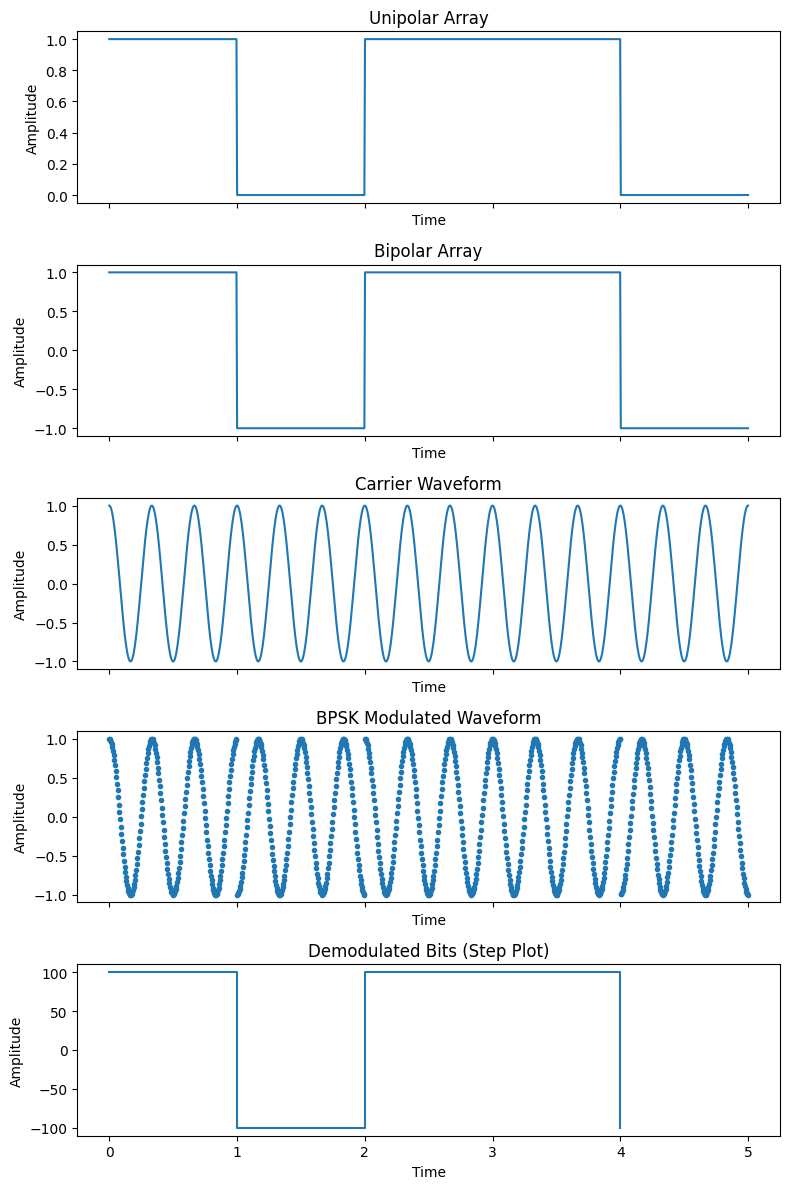

In [10]:

'''
   Phase Shift Keying(or Binary PSK) Modulation and Demodulation

'''
import numpy as np
import matplotlib.pyplot as plt

# Given unipolar array
unipolar_arr = np.array([1, 0, 1, 1, 0])

# Convert to bipolar
bipolar = 2 * unipolar_arr - 1

# Parameters
bit_duration = 1
amplitude_scaling_factor = bit_duration / 2
carrier_frequency = 3 / bit_duration
n_samples = 1000
time = np.linspace(0, 5, n_samples)

# Generate waveform
waveform = np.sqrt(2 * amplitude_scaling_factor / bit_duration) * np.cos(2 * np.pi * carrier_frequency * time)

# Generate BPSK modulated waveform
bpsk_w = bipolar.repeat(n_samples // unipolar_arr.size) * waveform

# Demodulation
bpsk_demodulated = bpsk_w * waveform  # Multiply by carrier waveform

demodulated_bits = np.array([np.sum(bpsk_demodulated[i:i + n_samples // unipolar_arr.size])
                              for i in range(0, len(bpsk_demodulated), n_samples // unipolar_arr.size)])

# Plotting
fig, axs = plt.subplots(5, 1, sharex=True, figsize=(8, 12))
axs[0].plot(time, unipolar_arr.repeat(n_samples // unipolar_arr.size))
axs[0].set_title('Unipolar Array')
axs[1].plot(time, bipolar.repeat(n_samples // unipolar_arr.size))
axs[1].set_title('Bipolar Array')
axs[2].plot(time, waveform)
axs[2].set_title('Carrier Waveform')
axs[3].plot(time, bpsk_w, '.')
axs[3].set_title('BPSK Modulated Waveform')
axs[4].step(np.arange(0, len(demodulated_bits)), demodulated_bits, where='post')
axs[4].set_title('Demodulated Bits (Step Plot)')

for ax in axs:
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()
